In [1]:
pwd

'/home/myubu/Documents/DS_projects_23-APR-2020/Simplilearn_projects/02_Healthcare_Capstone_project'

   <h1 style="font-family:Tahoma; color:Green; font-size: 50px;" >CAPSTONE PROJECT 2: Health Care Case Study</h1>

   <h1 style="font-family:Tahoma; color:Blue; font-size: 20px;" > PROBLEM STATEMENT </h1>

   <p style="font-family:Tahoma; color:White; font-size: 20px;" >NIDDK(National Institute of Diabetes and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly and consequential diseases.<br>
The dataset used in this project is originally from NIDDK. The objetive is to predict whether or not a patient has Diabetes, based on certain diagnostic measurements included in the dataset.<br>
    <br>
Build a model to accurately predict whether the patients in the dataset have diabetes or not. </p>

   <h1 style="font-family:Tahoma; color:Blue; font-size: 20px;" > 1. Import data </h1>

In [2]:
import os

import warnings
warnings.filterwarnings('ignore')

In [3]:
os.getcwd()

'/home/myubu/Documents/DS_projects_23-APR-2020/Simplilearn_projects/02_Healthcare_Capstone_project'

In [4]:
csv_s = []

for file in os.listdir():
    if file.endswith('.csv'):
        print(file)
        csv_s.append(file)
        
print(csv_s)

healthcare appointment data.csv
health care diabetes.csv
train.csv
['healthcare appointment data.csv', 'health care diabetes.csv', 'train.csv']


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

import helpers_py as hf

pd.set_option('max_columns', 90)
pd.set_option('max_rows', 90)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [6]:
train_df = pd.read_csv('health care diabetes.csv')

In [7]:
print('train_df shape: ', train_df.shape)

train_df shape:  (768, 9)


In [8]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h1 style="font-family:Tahoma; color:Brown; font-size: 30px;" >     Exploratory Data Analysis (EDA)</h1>

<h1 style="font-family:Tahoma; color:Brown; font-size: 20px;" >Project Task: Week 1</h1>

 

   <h1 style="font-family:Tahoma; color:Blue; font-size: 20px;" > 1. Perform Descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of 0 does not make sense and thus indicates a missing value:<br/>
    <br/>
                    &nbsp. Glucose<br/>
                    &nbsp. Blood Pressure<br/>
                    &nbsp. Skin Thickness<br/>
                    &nbsp. Insulin<br/>
                    &nbsp. BMI<br/>
                    </h1>

   <h1 style="font-family:Tahoma; color:Blue; font-size: 20px;" >2. Visually explore these variables using Histograms. Treat Missing values accordingly.</h1>

In [9]:
miss_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

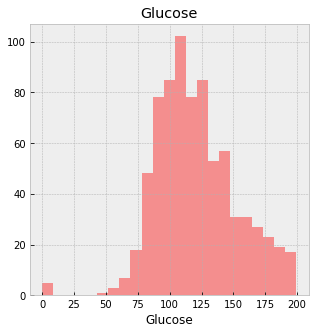

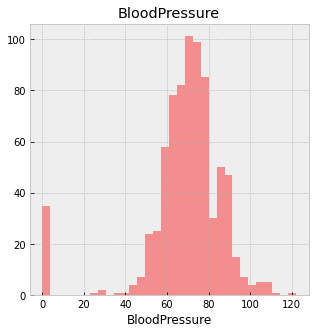

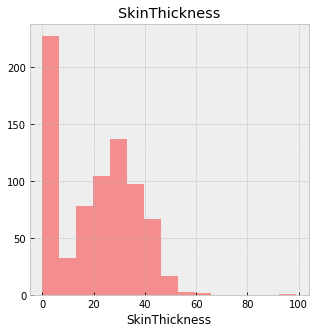

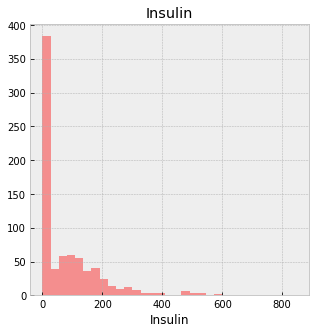

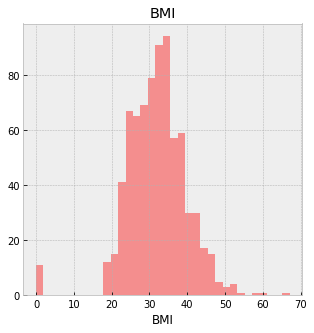

In [10]:
for col in miss_cols:
    plt.figure(figsize = (5, 5))
    plt.title(col)
    sns.distplot(train_df[col], kde = False, color = 'red')

In [11]:
train_df[['Glucose', 	'BloodPressure', 	'SkinThickness', 	'Insulin', 	'BMI']] = train_df[['Glucose', 	'BloodPressure', 	'SkinThickness', 	'Insulin', 	'BMI']].replace(0, np.nan)

In [12]:
from impyute.imputation.cs import fast_knn

In [13]:
imputed_train_df = fast_knn(train_df.values, k = 30)

In [14]:
imputed_train_df

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [15]:
imputed_df = pd.DataFrame(imputed_train_df)

In [16]:
imputed_df.head()

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.000000,155.157429,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.271135,155.596146,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0


In [17]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [18]:
train_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
imputed_df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [20]:
imputed_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,155.157429,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.271135,155.596146,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0


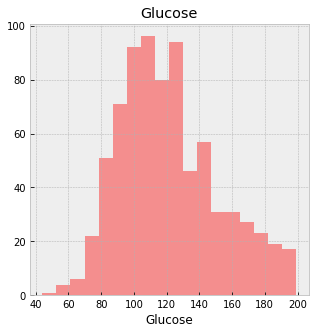

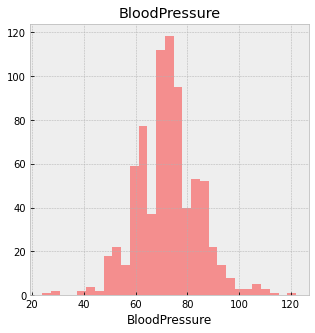

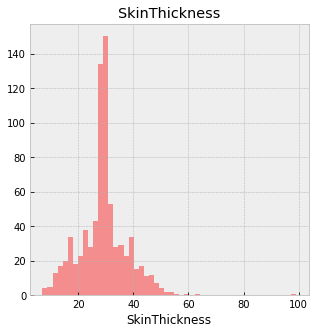

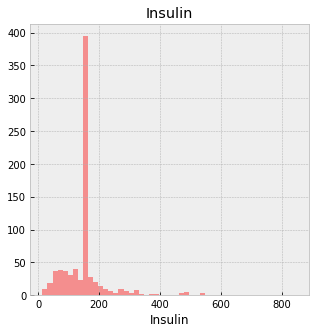

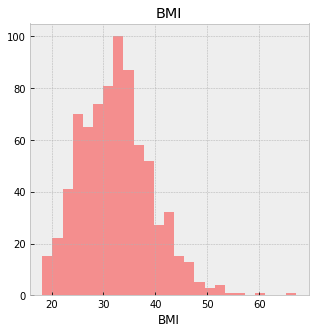

In [21]:
for col in miss_cols:
    plt.figure(figsize = (5, 5))
    plt.title(col)
    sns.distplot(imputed_df[col], kde = False, color = 'red')

In [22]:
imputed_df.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object

   <h1 style="font-family:Tahoma; color:Blue; font-size: 20px;" >3. There are Integer and Float data type variables in this dataset. create a count(Frequency) plot describing the data types and the count of variables. </h1>

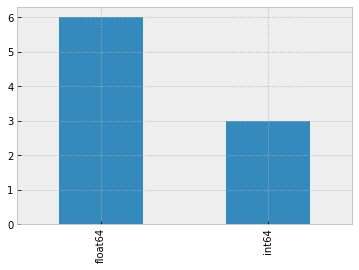

In [23]:
(train_df.dtypes).value_counts().plot(kind = 'bar')
plt.show()

<h1 style="font-family:Tahoma; color:Brown; font-size: 30px;" >     Exploratory Data Analysis (EDA) Contd....,</h1>

<h1 style="font-family:Tahoma; color:Brown; font-size: 20px;" >Project Task: Week 2</h1>

 

   <h1 style="font-family:Tahoma; color:Blue; font-size: 20px;" > 1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.
                    </h1>

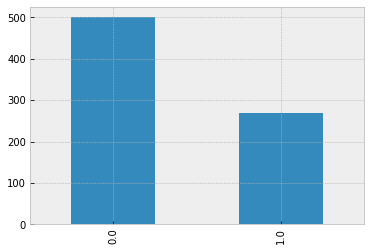

In [24]:
(imputed_df.Outcome).value_counts().plot(kind = 'bar')
plt.show()

In [25]:
imputed_df.Outcome.value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

In [26]:
round(imputed_df.Outcome.value_counts(normalize = True)*100, 2)

0.0    65.1
1.0    34.9
Name: Outcome, dtype: float64

   <h1 style="font-family:Tahoma; color:Green; font-size: 30px;" >This is a slightly imbalanced dataset with majority "Negative Class". We will create a balanced dataset using sampling Techniques</h1>

   <h1 style="font-family:Tahoma; color:Blue; font-size: 20px;" > 2. Create Scatter charts between the pair of variables to understand the relationships. Describe your findings.
                    </h1>

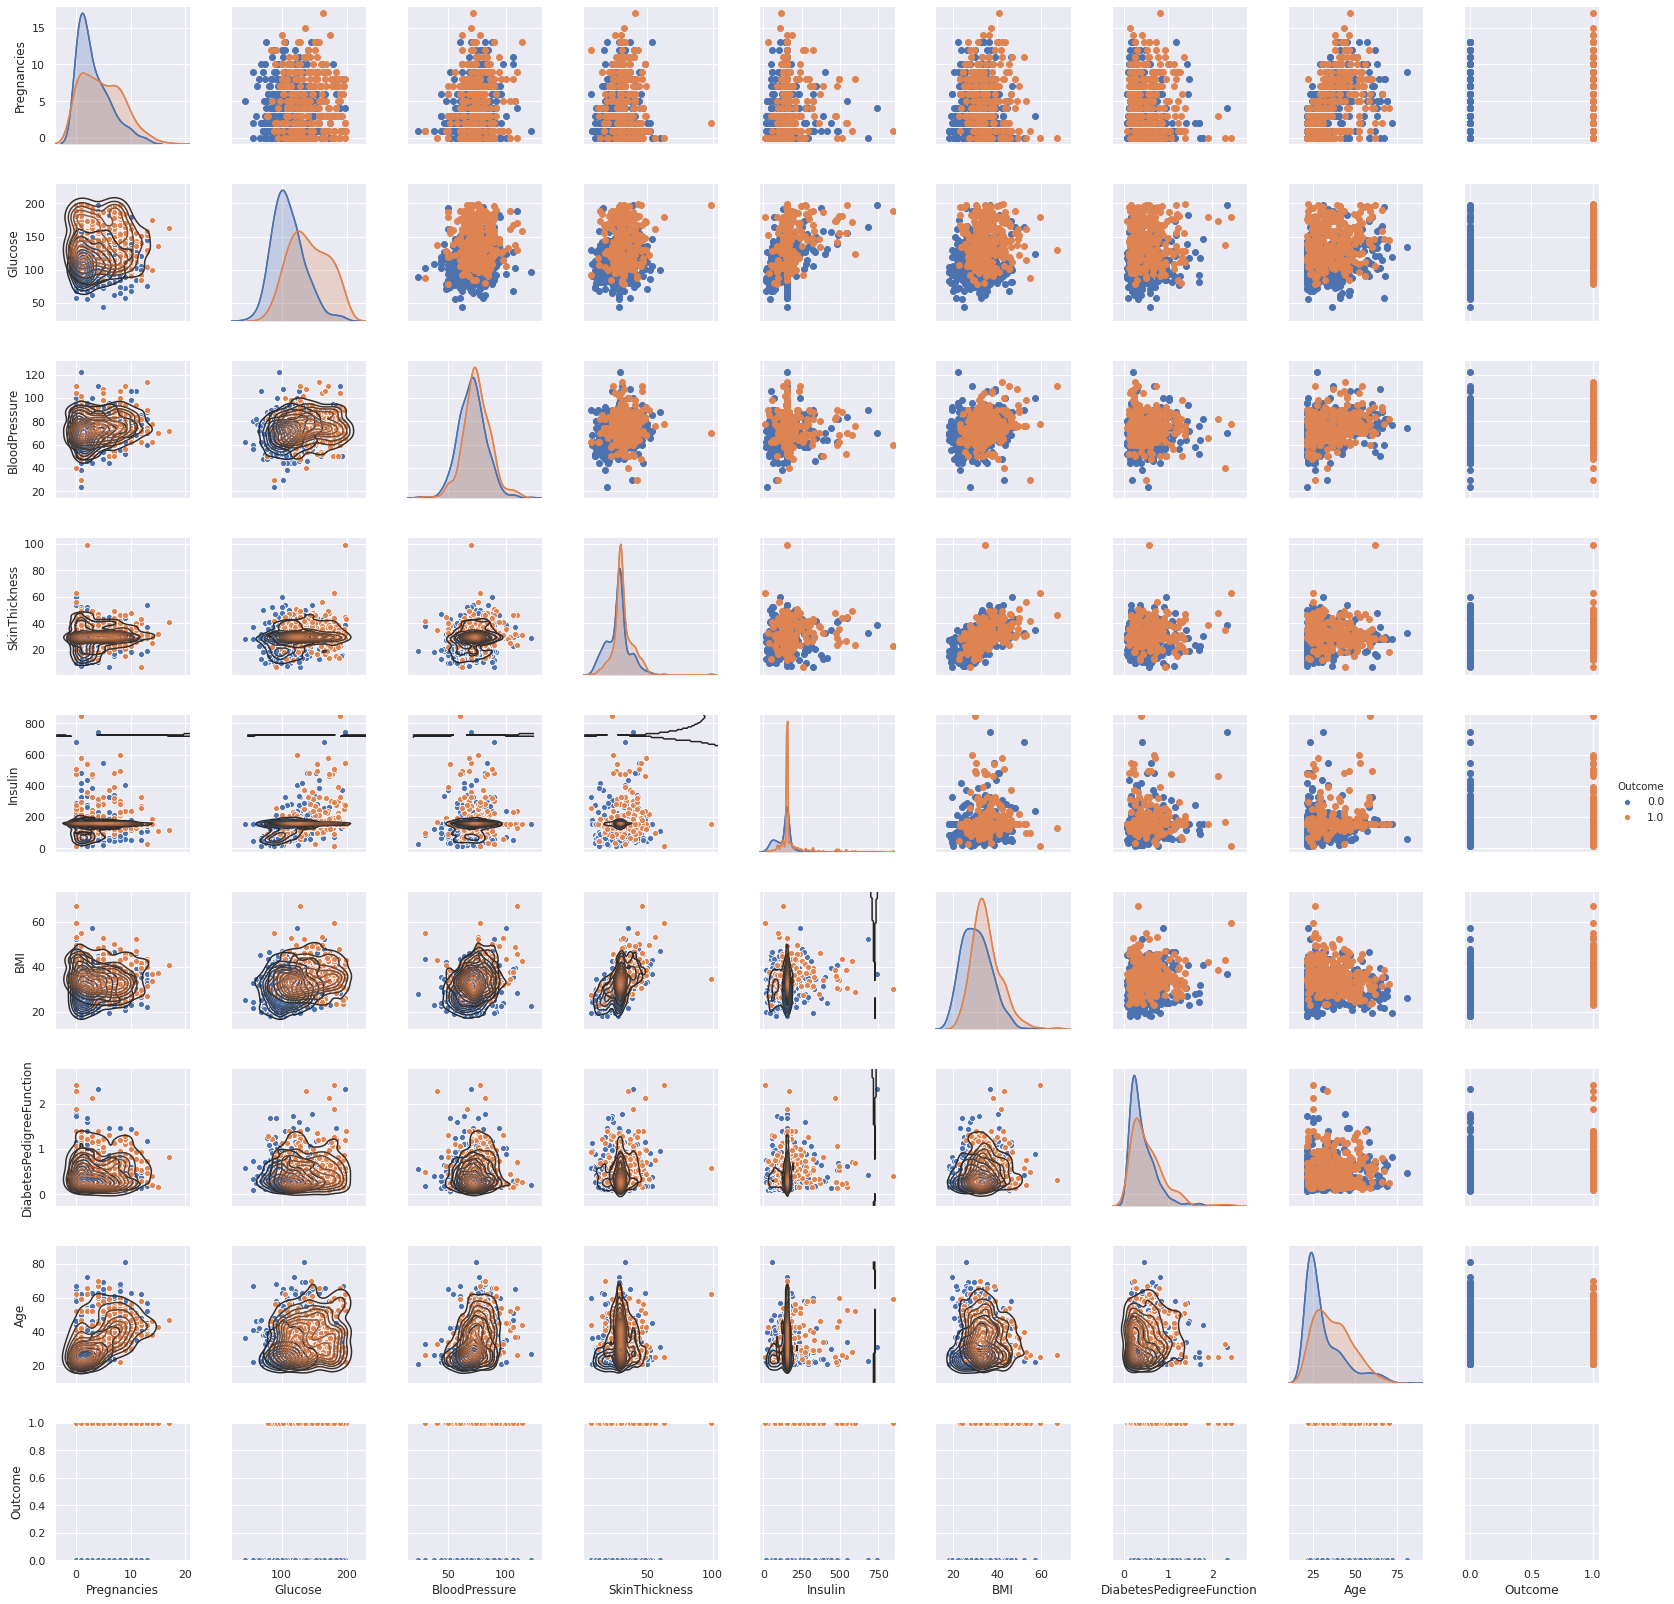

In [27]:
sns.set()
g = sns.pairplot(imputed_df, hue = 'Outcome')
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot)
plt.show()

   <h1 style="font-family:Tahoma; color:Green; font-size: 30px;" >This pairsplot shows the extent and direction of correlation between variables as well as the spread of the data for each pair, distinguishing them by the "Outcome"</h1>

   <h1 style="font-family:Tahoma; color:Blue; font-size: 20px;" > 3. Perform correlation analysis. Visually explore it using a heatmap.
                    </h1>

In [28]:
round(imputed_df.corr()['Outcome'][:], 3).sort_values(ascending = False)

Outcome                     1.000
Glucose                     0.494
BMI                         0.314
Age                         0.238
SkinThickness               0.226
Pregnancies                 0.222
Insulin                     0.214
DiabetesPedigreeFunction    0.174
BloodPressure               0.169
Name: Outcome, dtype: float64

In [29]:
def color_negative_red(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value < -0.1:
    color = 'red'
  elif value > 0.1:
    color = 'green'
  else:
    color = 'white'

  return 'color: %s' % color

In [30]:
round(imputed_df.corr(), 3).style.applymap(color_negative_red)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1,0.129,0.209,0.086,0.056,0.022,-0.034,0.544,0.222
Glucose,0.129,1,0.222,0.202,0.421,0.233,0.138,0.268,0.494
BloodPressure,0.209,0.222,1,0.203,0.072,0.284,-0.001,0.328,0.169
SkinThickness,0.086,0.202,0.203,1,0.158,0.561,0.103,0.127,0.226
Insulin,0.056,0.421,0.072,0.158,1,0.166,0.099,0.136,0.214
BMI,0.022,0.233,0.284,0.561,0.166,1,0.154,0.026,0.314
DiabetesPedigreeFunction,-0.034,0.138,-0.001,0.103,0.099,0.154,1,0.034,0.174
Age,0.544,0.268,0.328,0.127,0.136,0.026,0.034,1,0.238
Outcome,0.222,0.494,0.169,0.226,0.214,0.314,0.174,0.238,1


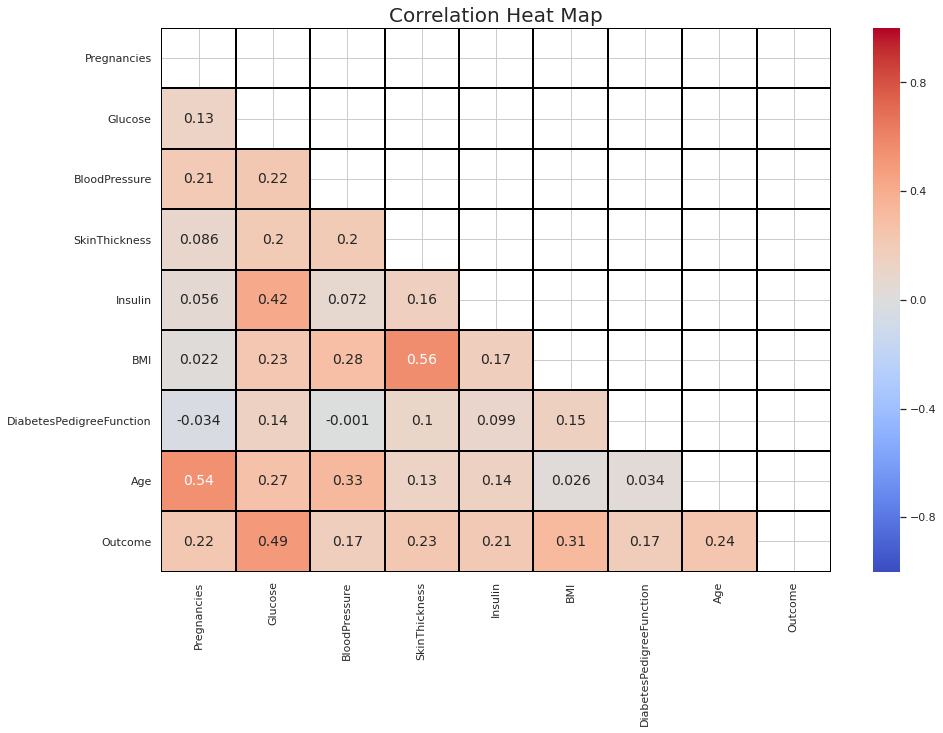

In [31]:
sns.set_style("whitegrid")

corr = train_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#kot = corr[corr>=.6]
plt.figure(figsize=(15,10))
sns.heatmap(round(imputed_df.corr(), 3), cmap="coolwarm", vmin=-1, vmax=1, annot = True, mask = mask, linewidths=1, linecolor='black', annot_kws={"fontsize":14}).set_title('Correlation Heat Map', fontsize = 20)
plt.grid('on', )
plt.show()

   <h1 style="font-family:Tahoma; color:Green; font-size: 30px;" >From the HeatMap, we can see that Majority of the correlations are "Positive", but weak. Strongest correlated pairs are <br> "BMI : Skin Thickness", "Age : Pregnancies", "Glucose : Outcome(Target Variable)", <br> "Insulin : Glucose" </h1>

<h1 style="font-family:Tahoma; color:Brown; font-size: 30px;" >Data Modeling</h1>

<h1 style="font-family:Tahoma; color:Brown; font-size: 20px;" >Project Task: Week 3</h1>

 

   <h1 style="font-family:Tahoma; color:Green; font-size: 25px;" >1) From our EDA visualisations, we realized that: There is missing data, So we Impute the data (I have used "Knn Imputation") <br> <br>2) Since our variables are on different scale and not distributed in Gaussian form, I chose to scale the data using MinMaxScaler, for better performance of the model.  <br><br> 3) Started with Logistic Regression, without sampling the data, but got a poor recall score  <br><br> 4) Also, we know that Our classes are imbalanced, So I have used "SMOTE" sampling to balance the classes, to improve recall score.<br><br> 5) Then, I chose to try different classifiers, to get better "Recall" score.<br></h1>

In [32]:
imputed_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,155.157429,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.271135,155.596146,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

In [34]:
imputed_df_scaled = scaler.fit_transform(imputed_df)

In [35]:
imputed_df_scaled = pd.DataFrame(imputed_df_scaled, columns=imputed_df.columns)

In [36]:
imputed_df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.169660,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.242078,0.170188,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
imputed_df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.169660,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.242078,0.170188,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


In [39]:
y = imputed_df_scaled['Outcome']
x = imputed_df_scaled.drop('Outcome', axis = 1)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)

In [41]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
36,0.647059,0.606452,0.530612,0.245812,0.170289,0.306748,0.146029,0.233333
175,0.470588,0.870968,0.489796,0.380435,0.139423,0.296524,0.273698,0.250000
126,0.176471,0.490323,0.469388,0.250000,0.145433,0.505112,0.159693,0.150000
364,0.235294,0.664516,0.510204,0.195652,0.335337,0.341513,0.131085,0.150000
574,0.058824,0.638710,0.632653,0.250000,0.379808,0.243354,0.347566,0.033333


In [42]:
y_train.head()

36     0.0
175    1.0
126    0.0
364    0.0
574    0.0
Name: Outcome, dtype: float64

In [43]:
lr = LogisticRegression()

In [44]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
pred = lr.predict(x_test)

In [46]:
cnf_matrix = confusion_matrix(y_test, pred)

In [47]:
cnf_matrix

array([[92,  8],
       [26, 28]])

In [48]:
def sens_spec(cnf_matrix):

    total_cm = sum(sum(cnf_matrix))

    accuracy_clf = (cnf_matrix[0,0] + cnf_matrix[1,1]) / total_cm

    sensitivity_clf = cnf_matrix[0,0] / (cnf_matrix[0, 0] + cnf_matrix[0, 1])

    specificity_clf = cnf_matrix[1,1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1])
    
    #print('accuracy of {} is {}'.format(accurac)
    return('Accuracy: {}'.format(round(accuracy_clf, 2)), 'Sensitivity: {}'.format(round(sensitivity_clf, 2)), 'Specificity: {}'.format(round(specificity_clf, 2)))

In [49]:
# Use score method to get accuracy of model
score = lr.score(x_test, y_test)
print(score)

0.7792207792207793


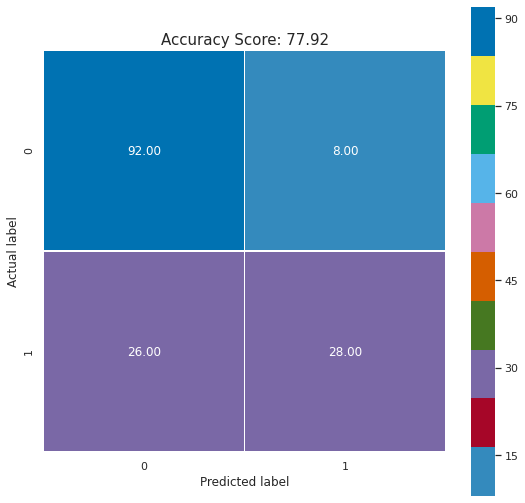

In [50]:
plt.figure(figsize=(9,9))
sns.heatmap(cnf_matrix, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = color_pal);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(score*100, 2))
plt.title(all_sample_title, size = 15);

In [51]:
print(sens_spec(cnf_matrix))
print()
print(classification_report(y_test, pred))

('Accuracy: 0.78', 'Sensitivity: 0.92', 'Specificity: 0.52')

              precision    recall  f1-score   support

         0.0       0.78      0.92      0.84       100
         1.0       0.78      0.52      0.62        54

    accuracy                           0.78       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.78      0.78      0.77       154



In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
os = SMOTE(random_state=0)

In [54]:
columns = x_train.columns

In [55]:
os_data_X,os_data_y=os.fit_sample(x, y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Outcome'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of NEGATIVE in oversampled data",len(os_data_y[os_data_y['Outcome']==0]))
print("Number of POSITIVE",len(os_data_y[os_data_y['Outcome']==1]))
print("Proportion of NEGATIVE data in oversampled data is ",len(os_data_y[os_data_y['Outcome']==0])/len(os_data_X))
print("Proportion of POSITIVE data in oversampled data is ",len(os_data_y[os_data_y['Outcome']==1])/len(os_data_X))

length of oversampled data is  1000
Number of NEGATIVE in oversampled data 500
Number of POSITIVE 500
Proportion of NEGATIVE data in oversampled data is  0.5
Proportion of POSITIVE data in oversampled data is  0.5


In [56]:
X_train, X_test, y_train, y_test = train_test_split(os_data_X,os_data_y, test_size=0.2, random_state=0)

<h1 style="font-family:Tahoma; color:Brown; font-size: 30px;" >Data Modeling</h1>

<h1 style="font-family:Tahoma; color:Brown; font-size: 20px;" >Project Task: Week 4</h1>

 

In [57]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [58]:
import scikitplot as skplt

In [59]:
names = ["Nearest Neighbors", "Logistic Regression", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

classifier:  Nearest Neighbors
79.0
('Accuracy: 0.78', 'Sensitivity: 0.92', 'Specificity: 0.52')

              precision    recall  f1-score   support

         0.0       0.84      0.74      0.79       105
         1.0       0.75      0.84      0.79        95

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.80      0.79      0.79       200




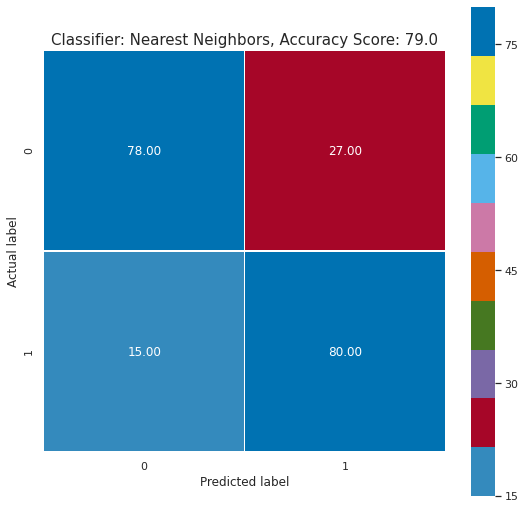

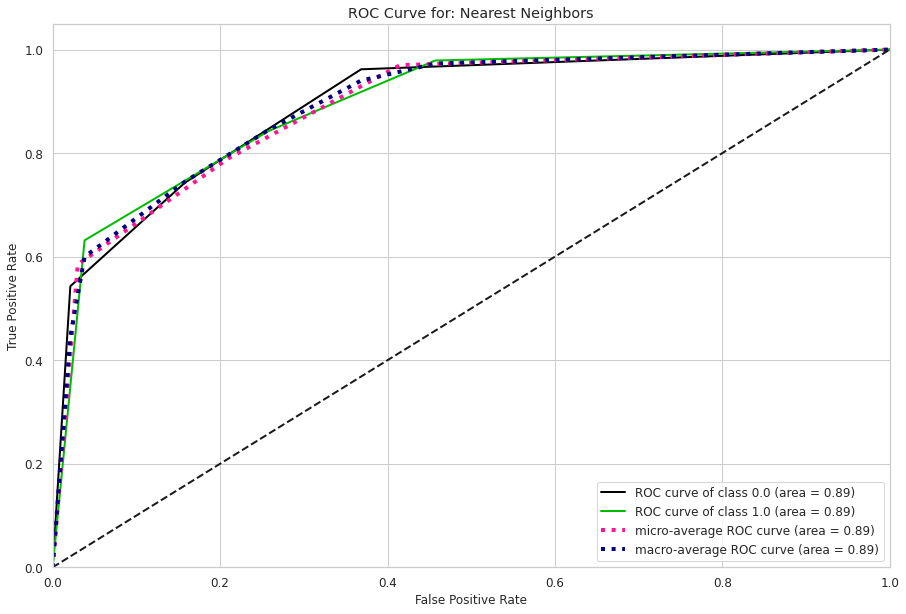

_____________________________________________________________________________________

classifier:  Logistic Regression
76.5
('Accuracy: 0.79', 'Sensitivity: 0.74', 'Specificity: 0.84')

              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78       105
         1.0       0.76      0.74      0.75        95

    accuracy                           0.77       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.77      0.76       200




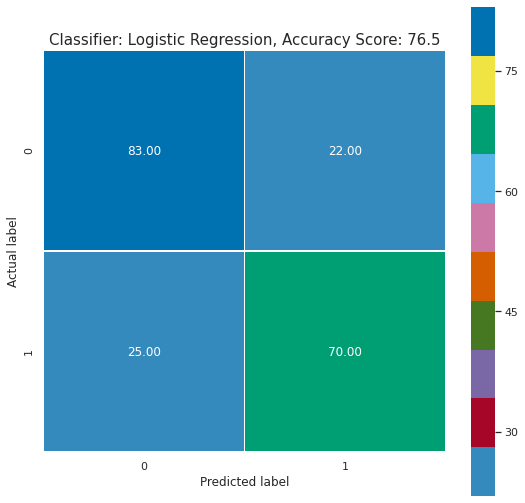

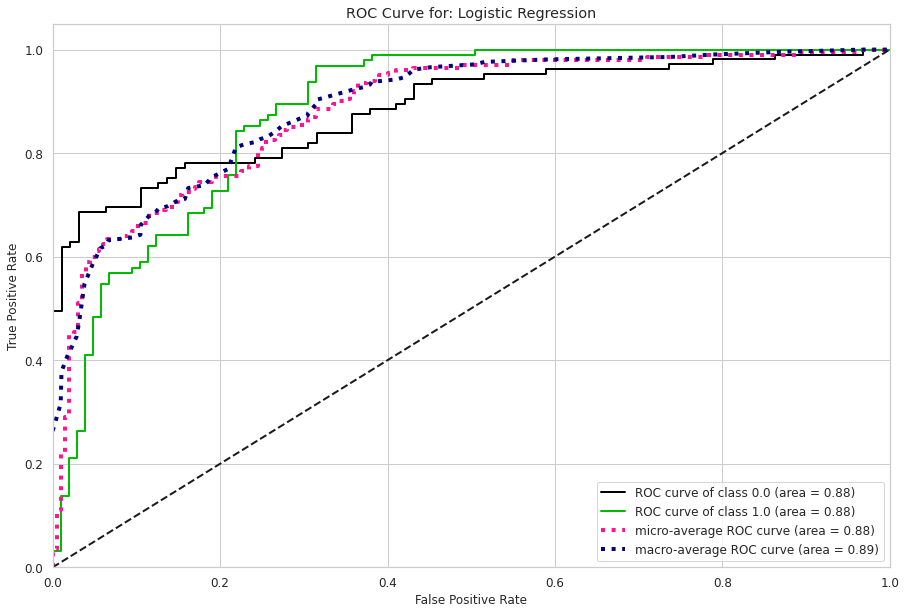

_____________________________________________________________________________________

classifier:  Linear SVM
75.5
('Accuracy: 0.76', 'Sensitivity: 0.79', 'Specificity: 0.74')

              precision    recall  f1-score   support

         0.0       0.75      0.81      0.78       105
         1.0       0.77      0.69      0.73        95

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200




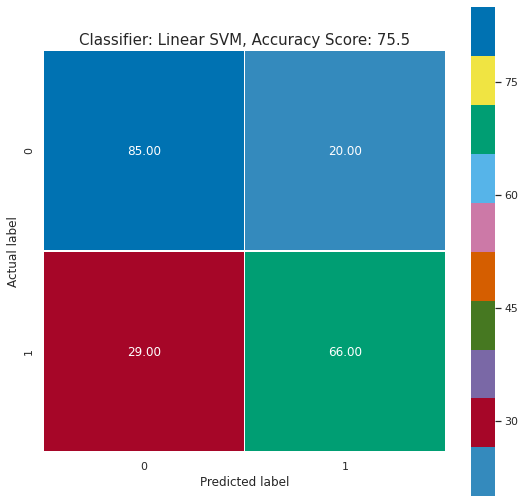

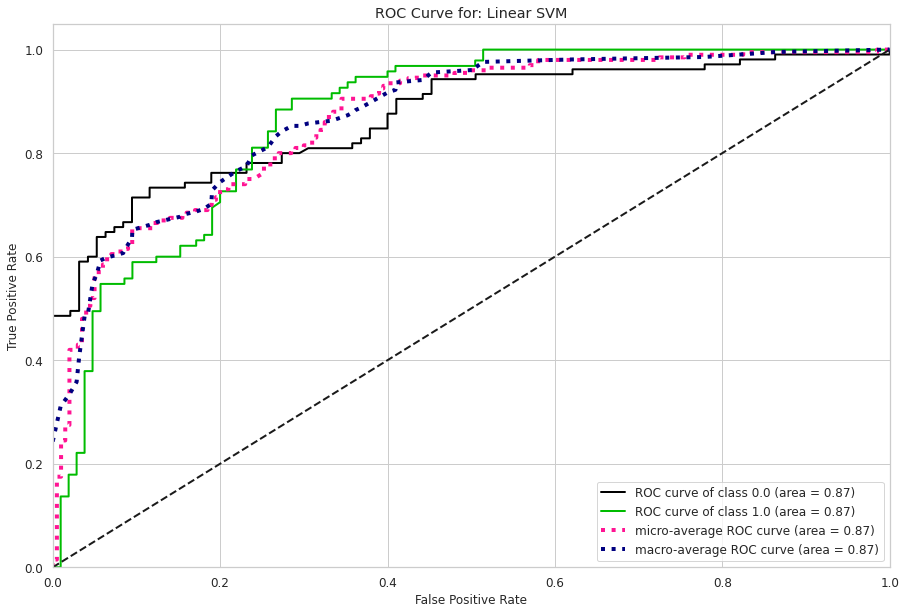

_____________________________________________________________________________________

classifier:  RBF SVM
84.5
('Accuracy: 0.76', 'Sensitivity: 0.81', 'Specificity: 0.69')

              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84       105
         1.0       0.80      0.89      0.85        95

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.84       200




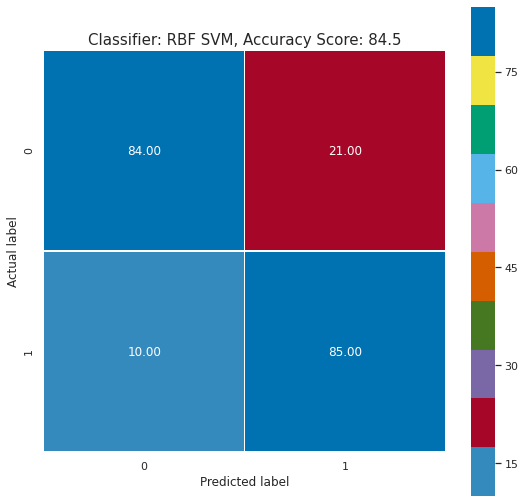

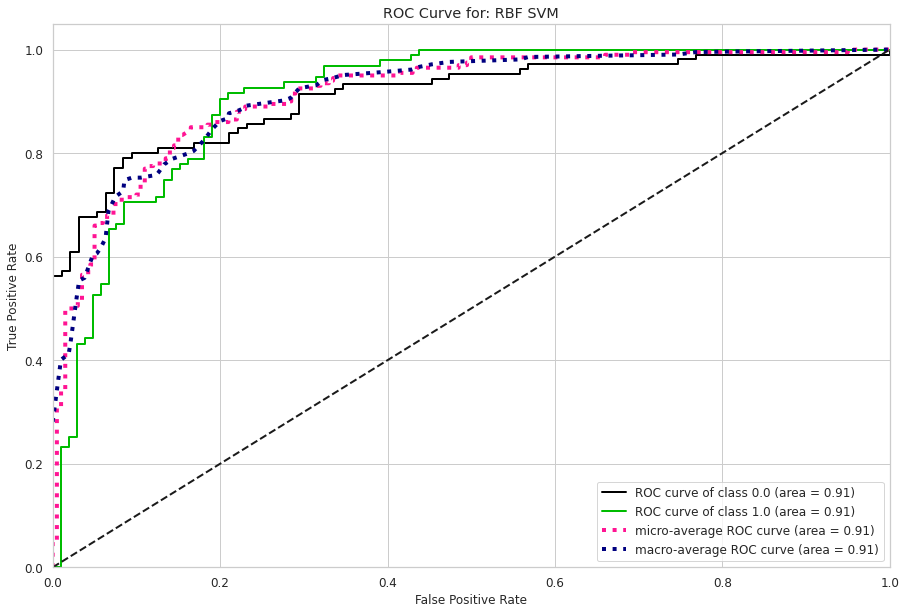

_____________________________________________________________________________________

classifier:  Gaussian Process
84.0
('Accuracy: 0.84', 'Sensitivity: 0.8', 'Specificity: 0.89')

              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84       105
         1.0       0.81      0.87      0.84        95

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200




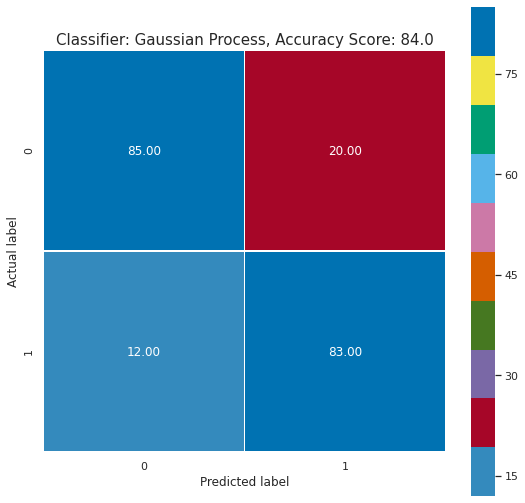

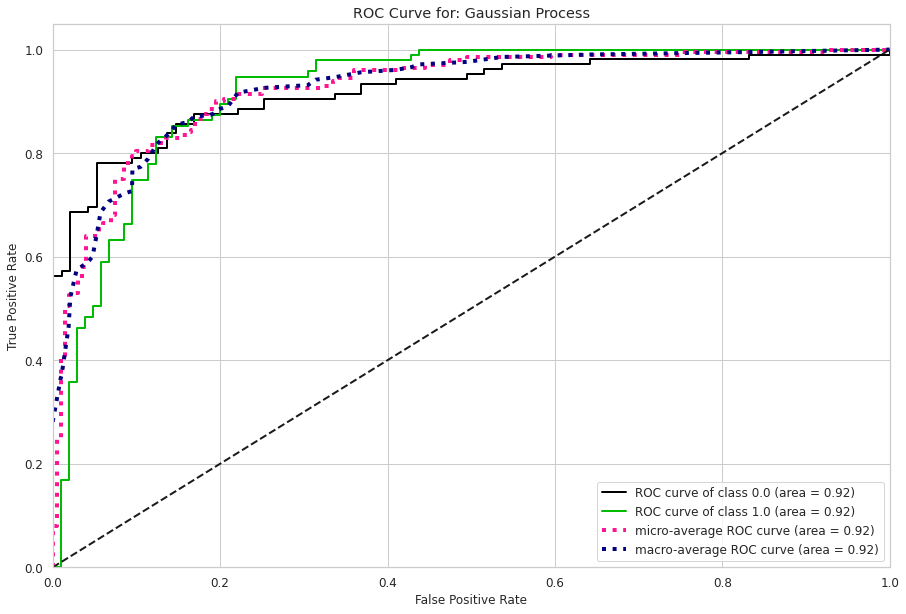

_____________________________________________________________________________________

classifier:  Decision Tree
78.0
('Accuracy: 0.84', 'Sensitivity: 0.81', 'Specificity: 0.87')

              precision    recall  f1-score   support

         0.0       0.82      0.74      0.78       105
         1.0       0.74      0.82      0.78        95

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200




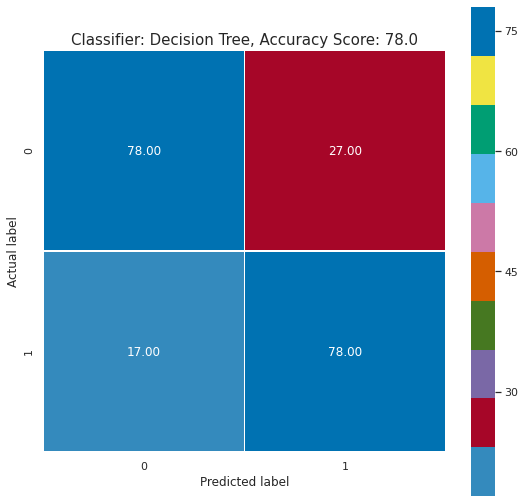

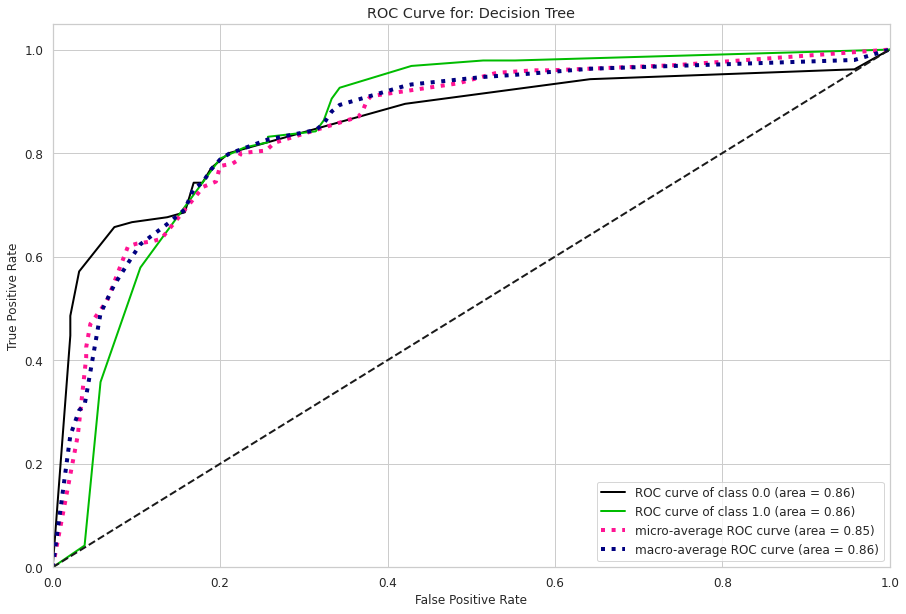

_____________________________________________________________________________________

classifier:  Random Forest
80.0
('Accuracy: 0.78', 'Sensitivity: 0.74', 'Specificity: 0.82')

              precision    recall  f1-score   support

         0.0       0.85      0.75      0.80       105
         1.0       0.76      0.85      0.80        95

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200




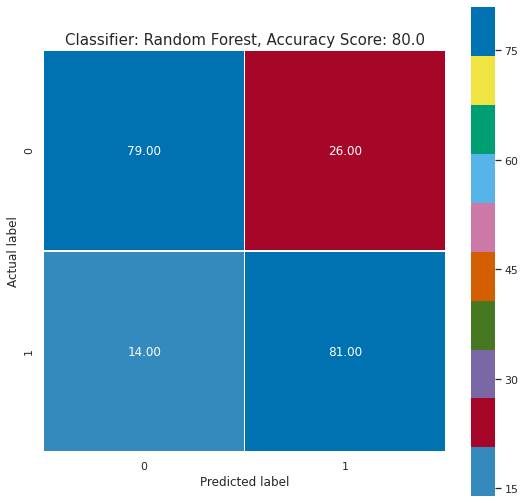

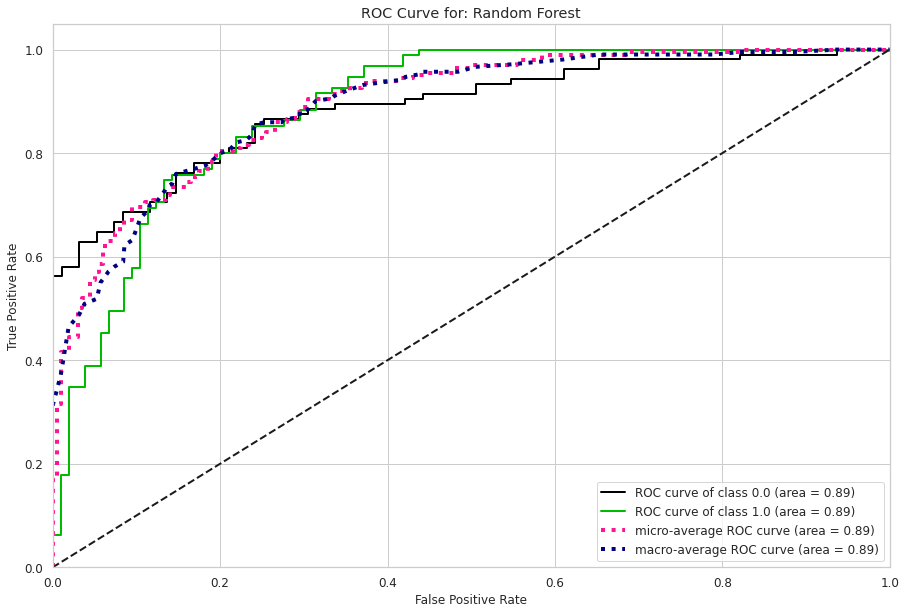

_____________________________________________________________________________________

classifier:  Neural Net
78.0
('Accuracy: 0.8', 'Sensitivity: 0.75', 'Specificity: 0.85')

              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79       105
         1.0       0.77      0.77      0.77        95

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200




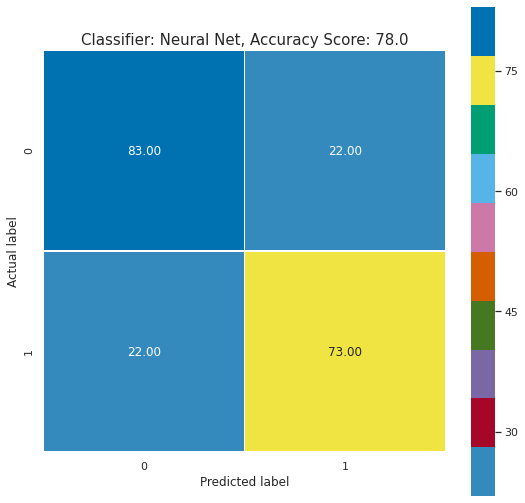

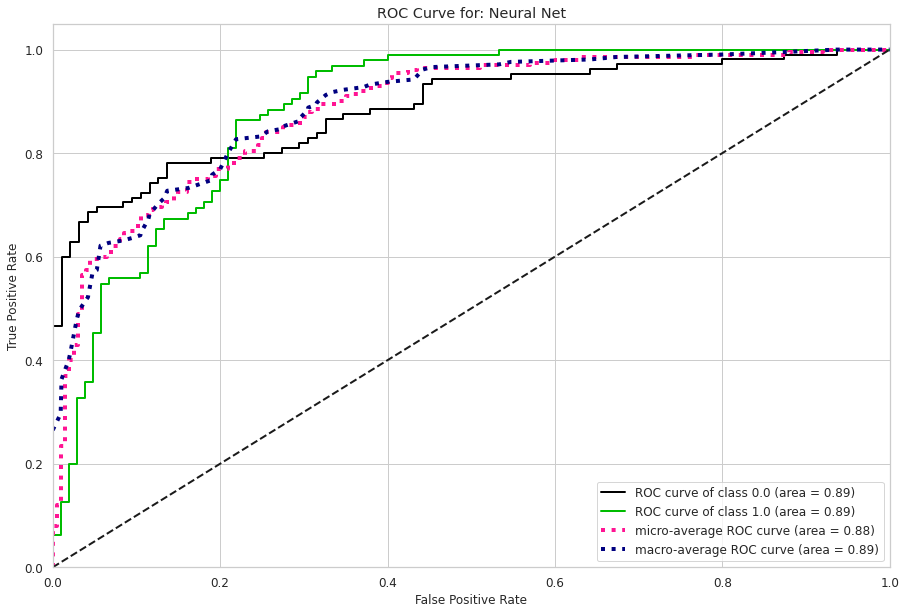

_____________________________________________________________________________________

classifier:  AdaBoost
80.5
('Accuracy: 0.78', 'Sensitivity: 0.79', 'Specificity: 0.77')

              precision    recall  f1-score   support

         0.0       0.84      0.77      0.81       105
         1.0       0.77      0.84      0.80        95

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.81       200




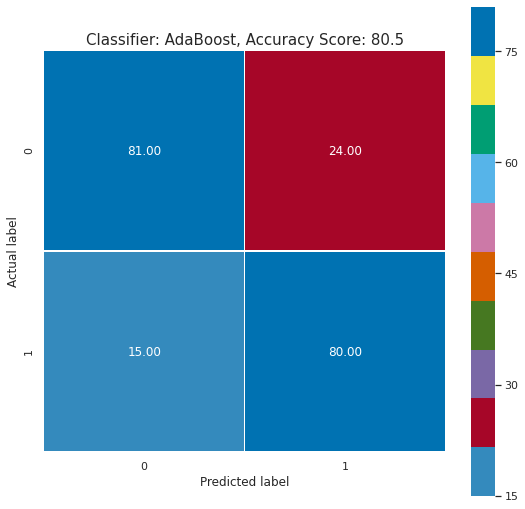

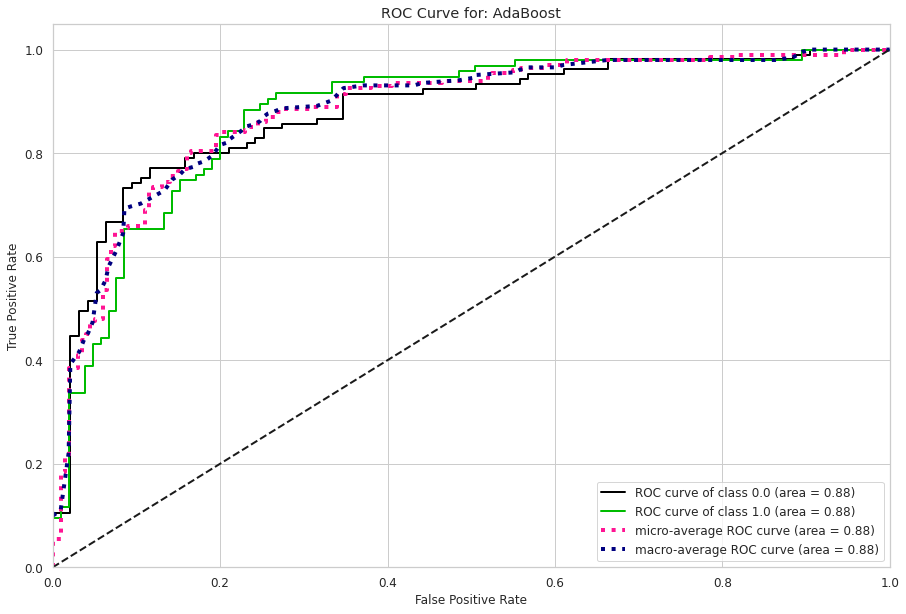

_____________________________________________________________________________________

classifier:  Naive Bayes
78.0
('Accuracy: 0.8', 'Sensitivity: 0.77', 'Specificity: 0.84')

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79       105
         1.0       0.77      0.76      0.77        95

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200




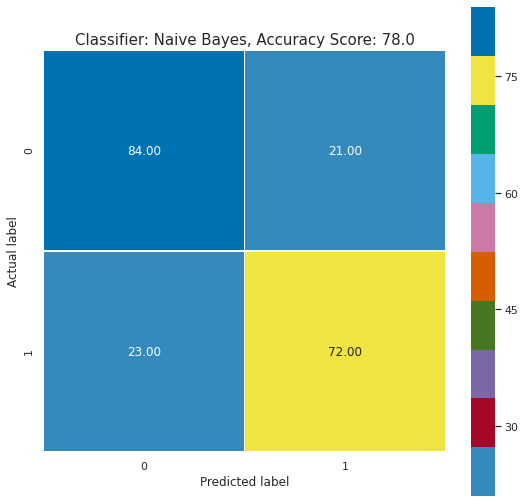

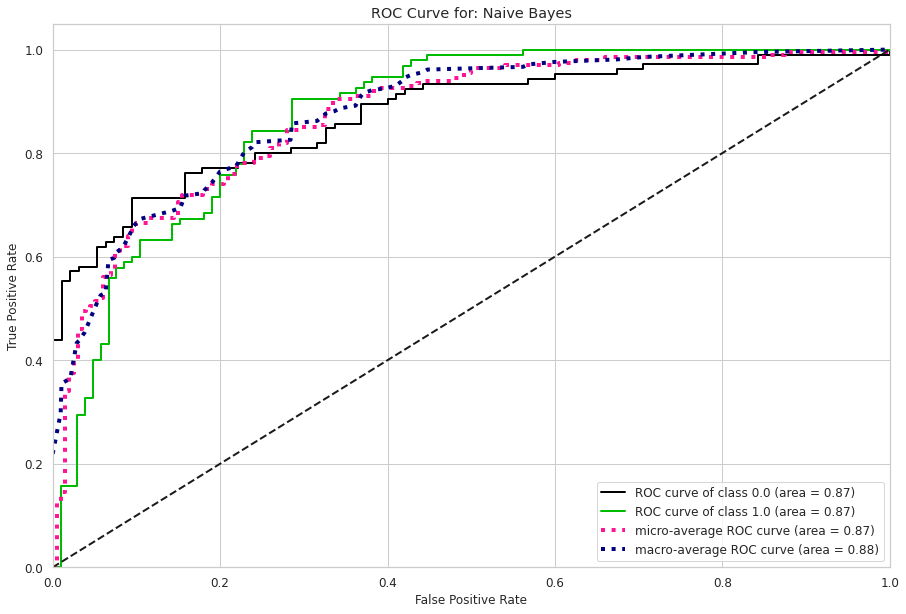

_____________________________________________________________________________________

classifier:  QDA
77.5
('Accuracy: 0.78', 'Sensitivity: 0.8', 'Specificity: 0.76')

              precision    recall  f1-score   support

         0.0       0.76      0.83      0.79       105
         1.0       0.79      0.72      0.75        95

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.77       200




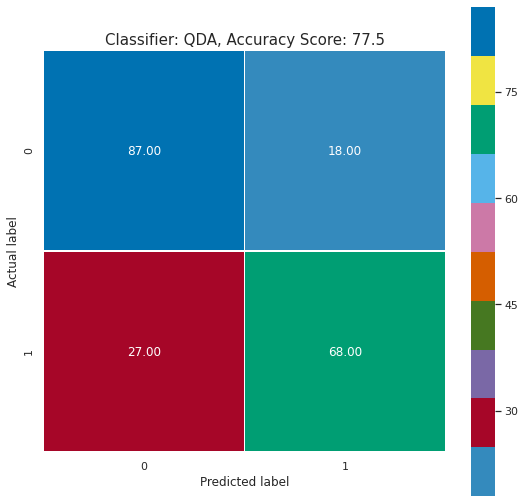

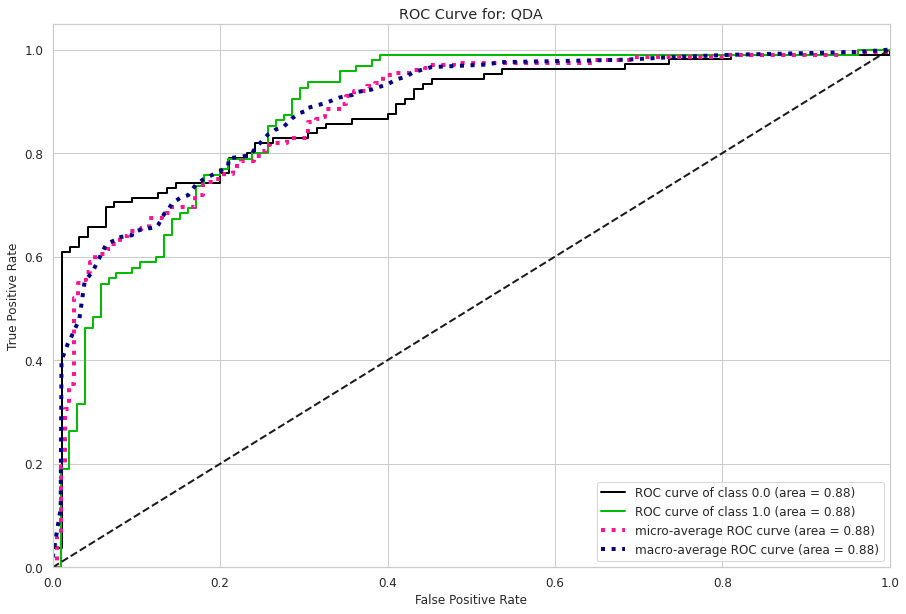

_____________________________________________________________________________________



In [60]:
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        print('classifier: ', name)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        pred = clf.predict(X_test)
        prob = clf.predict_proba(X_test)
        print(round(score*100, 2))
        print(sens_spec(cnf_matrix))
        print()
        
        cnf_matrix = confusion_matrix(y_test, pred)
        plt.figure(figsize=(9,9))
        sns.heatmap(cnf_matrix, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = color_pal);
        plt.ylabel('Actual label');
        plt.xlabel('Predicted label');
        #all_sample_title = 'Accuracy Score: {0}'.format(round(score*100, 2))
        all_sample_title ='Classifier: {}, Accuracy Score: {}'.format(name, round(score*100, 2))
        plt.title(all_sample_title, size = 15);

        #print()
        print(classification_report(y_test, pred))
        print()

        skplt.metrics.plot_roc_curve(y_test, prob, figsize = (15, 10), title = 'ROC Curve for: {}'.format(name))
        plt.show()
        print('_____________________________________________________________________________________')
        print()

  <h1 style="font-family:Tahoma; color:Green; font-size: 30px;" >Let's Check how close our algorithm is predicting, by passing the inputs from our test set and compare them to the target values.</h1>

In [61]:
#import random
np.random.seed(1000)
randomlist = []
for i in range(0,10):
    n = np.random.randint(1,len(X_test))
    randomlist.append(n)
print(randomlist)

[180, 88, 72, 193, 95, 93, 2, 190, 129, 90]


In [62]:
list(X_test.iloc[180])

[0.058823529411764705,
 0.3161290322580645,
 0.4693877551020407,
 0.2608695652173913,
 0.17017815807641148,
 0.24948875255623731,
 0.10119555935098205,
 0.033333333333333326]

In [63]:
y_test.iloc[180]['Outcome']

0.0

In [64]:
pre_out = []
out = []

for i in randomlist:
    data_in = [list(X_test.iloc[i])]
    data_in = np.around(data_in, 2)
    pre_data_out = lr.predict(data_in)
    data_out = y_test.iloc[i]['Outcome']
    
    mylist = [i, data_in, pre_data_out, data_out]
    print(*mylist,sep='\n')
    print('------------------------')
    
    pre_out.append(pre_data_out)
    out.append(data_out)
    


180
[[0.06 0.32 0.47 0.26 0.17 0.25 0.1  0.03]]
[0.]
0.0
------------------------
88
[[0.12 0.24 0.49 0.09 0.07 0.24 0.2  0.07]]
[0.]
0.0
------------------------
72
[[0.65 0.49 0.57 0.33 0.16 0.49 0.3  0.45]]
[1.]
1.0
------------------------
193
[[0.29 0.46 0.51 0.24 0.17 0.15 0.05 0.15]]
[0.]
0.0
------------------------
95
[[0.   0.59 0.45 0.38 0.28 0.49 0.12 0.05]]
[0.]
1.0
------------------------
93
[[0.12 0.41 0.39 0.03 0.32 0.15 0.34 0.02]]
[0.]
0.0
------------------------
2
[[0.82 0.36 0.55 0.2  0.2  0.38 0.14 0.42]]
[0.]
1.0
------------------------
190
[[0.52 0.46 0.57 0.27 0.19 0.32 0.08 0.26]]
[0.]
1.0
------------------------
129
[[0.   0.7  0.59 0.35 0.31 0.48 0.08 0.1 ]]
[1.]
0.0
------------------------
90
[[0.   0.3  0.45 0.27 0.24 0.44 0.13 0.07]]
[0.]
0.0
------------------------


In [65]:
svc = SVC(gamma=2, C=1, probability=True)
svc.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [66]:
pre_out = []
out = []

for i in randomlist:
    data_in = [list(X_test.iloc[i])]
    data_in = np.around(data_in, 2)
    pre_data_out = svc.predict(data_in)
    data_out = y_test.iloc[i]['Outcome']
    
    mylist = [i, data_in, pre_data_out, data_out]
    print(*mylist,sep='\n')
    print('------------------------')
    
    pre_out.append(pre_data_out)
    out.append(data_out)
    


180
[[0.06 0.32 0.47 0.26 0.17 0.25 0.1  0.03]]
[0.]
0.0
------------------------
88
[[0.12 0.24 0.49 0.09 0.07 0.24 0.2  0.07]]
[0.]
0.0
------------------------
72
[[0.65 0.49 0.57 0.33 0.16 0.49 0.3  0.45]]
[1.]
1.0
------------------------
193
[[0.29 0.46 0.51 0.24 0.17 0.15 0.05 0.15]]
[0.]
0.0
------------------------
95
[[0.   0.59 0.45 0.38 0.28 0.49 0.12 0.05]]
[1.]
1.0
------------------------
93
[[0.12 0.41 0.39 0.03 0.32 0.15 0.34 0.02]]
[0.]
0.0
------------------------
2
[[0.82 0.36 0.55 0.2  0.2  0.38 0.14 0.42]]
[1.]
1.0
------------------------
190
[[0.52 0.46 0.57 0.27 0.19 0.32 0.08 0.26]]
[1.]
1.0
------------------------
129
[[0.   0.7  0.59 0.35 0.31 0.48 0.08 0.1 ]]
[1.]
0.0
------------------------
90
[[0.   0.3  0.45 0.27 0.24 0.44 0.13 0.07]]
[0.]
0.0
------------------------


  <h1 style="font-family:Tahoma; color:Green; font-size: 30px;" >Our Basic Logistic Regression algorithm is predicting 6 / 10 inputs correctly, <br> <br> whereas the best performing SVC algorithm is predicting 9 / 10 inputs correctly</h1>